In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configuration of the plots we will create

#read in the data

df = pd.read_csv(r'C:\Users\User\Desktop\DADS\GE15\aggregate_data.csv')


In [7]:
df.head()

,UNIQUE_CODE,PARLIAMENTARY_CODE,PARLIAMENTARY_NAME,TOTAL_ELECTORS,MALAY_p,CHINESE_p,INDIANS_p,ORANG_ASLI_p,BUMIPUTERA_SABAH_p,BUMIPUTERA_SARAWAK_p,...,Gallagher Index (%),Polsby-Popper Index,Parliament Area,Parliament Perimeter,Convex-Hull,Compactness,Convex Hull,Compactness Index,Reock Index,Convex Hull Index
0,P.001,P.001,PADANG BESAR,60192,86.01,8.14,0.88,0.33,0.57,0.01,...,-36.890278,0.036946,0.036797,0.997980,0.042132,0.036872,0.042132,0.036872,0.007900,0.873372
1,P.002,P.002,KANGAR,74859,81.58,14.73,1.57,0.13,0.08,0.00,...,-21.512316,0.021527,0.011549,0.732456,0.016717,0.015767,0.016717,0.015767,0.000453,0.690861
2,P.003,P.003,ARAU,60876,87.23,7.81,1.59,0.12,0.09,0.01,...,-36.173122,0.023790,0.018271,0.876355,0.024197,0.020848,0.024197,0.020848,0.001254,0.755082
3,P.004,P.004,LANGKAWI,66777,89.65,6.75,2.38,0.30,0.17,0.00,...,-29.986080,0.003714,0.038226,3.207962,0.068274,0.011916,0.068274,0.011916,0.000857,0.559885
4,P.005,P.005,JERLUN,67601,90.75,6.78,0.11,0.05,0.04,0.00,...,-29.122138,0.030987,0.025842,0.913211,0.031568,0.028298,0.031568,0.028298,0.003268,0.818608


In [9]:
#Check if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

UNIQUE_CODE - 0.0%
PARLIAMENTARY_CODE - 0.0%
PARLIAMENTARY_NAME - 0.0%
TOTAL_ELECTORS - 0.0%
MALAY_p - 0.0%
CHINESE_p - 0.0%
INDIANS_p - 0.0%
ORANG_ASLI_p - 0.0%
BUMIPUTERA_SABAH_p - 0.0%
BUMIPUTERA_SARAWAK_p - 0.0%
OTHERS_p - 0.0%
NORMAL_VOTERS_p - 0.0%
ABSENT_VOTERS_p - 0.0%
POLICE_p - 0.0%
MILITARY_p - 0.0%
18-20_p - 0.0%
21-29_p - 0.0%
30-39_p - 0.0%
40-49_p - 0.0%
50-59_p - 0.0%
60-69_p - 0.0%
70-79_p - 0.0%
80-89_p - 0.0%
ABOVE_90_p - 0.0%
MALE_p - 0.0%
WOMEN_p - 0.0%
CLASSIFICATION - 0.0%
WINNING_COALITION - 0.0045045045045045045%
WINNING_PARTY - 0.04054054054054054%
UNCONTESTED_VICTORY - 1.0%
TOTAL_ELECTORATE - 0.0%
WINNING_MAJORITY - 0.0045045045045045045%
TURNOUT_p - 1.0%
TOTAL_BALLOTS_ISSUED - 1.0%
TOTAL_UNRETURNED_VOTES - 1.0%
TOTAL_REJECTED_VOTES - 0.0045045045045045045%
TOTAL_VALID_VOTES - 0.0045045045045045045%
BN - 0.1981981981981982%
BN_CANDIDATE - 0.1981981981981982%
BN_CANDIDATE_GENDER - 0.1981981981981982%
BN_CANDIDATE_AGE - 0.4369369369369369%
BN_VOTE - 0.202702702

In [40]:
#determine the data types of each columns

print(df.dtypes)

UNIQUE_CODE                   object
PARLIAMENTARY_CODE            object
PARLIAMENTARY_NAME            object
TOTAL_ELECTORS                 int64
MALAY_p                      float64
CHINESE_p                    float64
INDIANS_p                    float64
ORANG_ASLI_p                 float64
BUMIPUTERA_SABAH_p           float64
BUMIPUTERA_SARAWAK_p         float64
OTHERS_p                     float64
18-20_p                      float64
21-29_p                      float64
30-39_p                      float64
40-49_p                      float64
50-59_p                      float64
60-69_p                      float64
70-79_p                      float64
80-89_p                      float64
ABOVE_90_p                   float64
MALE_p                       float64
WOMEN_p                      float64
CLASSIFICATION                object
WINNING_COALITION             object
WINNING_PARTY                 object
TOTAL_ELECTORATE               int64
WINNING_MAJORITY             float64
T

In [2]:
#exclude parliamentary constituencies outside of Sarawak 
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df = pd.read_csv(r'C:\Users\User\Desktop\DADS\GE15\aggregate_data.csv')

df = df.iloc[191:]
df.reset_index(drop=True, inplace=True)

print("Column names before deletion:")
print(df.columns)

columns_to_delete = list(range(11, 15)) + [29] + list(range(32, 36)) + list(range(37, 46)) + list(range(47, 51)) + list(range(52, 61)) + list(range(62, 74)) + list(range(83, 89)) + list(range(96, 129))
df = df.drop(df.columns[columns_to_delete], axis=1)
df.reset_index(drop=True, inplace=True)

print("Column names after deletion:")
print(df.columns)

df

Column names before deletion:
Index(['UNIQUE_CODE', 'PARLIAMENTARY_CODE', 'PARLIAMENTARY_NAME',
       'TOTAL_ELECTORS', 'MALAY_p', 'CHINESE_p', 'INDIANS_p', 'ORANG_ASLI_p',
       'BUMIPUTERA_SABAH_p', 'BUMIPUTERA_SARAWAK_p',
       ...
       'Gallagher Index (%)', 'Polsby-Popper Index', 'Parliament Area',
       'Parliament Perimeter', 'Convex-Hull', 'Compactness', 'Convex Hull',
       'Compactness Index', 'Reock Index', 'Convex Hull Index'],
      dtype='object', length=129)
Column names after deletion:
Index(['UNIQUE_CODE', 'PARLIAMENTARY_CODE', 'PARLIAMENTARY_NAME',
       'TOTAL_ELECTORS', 'MALAY_p', 'CHINESE_p', 'INDIANS_p', 'ORANG_ASLI_p',
       'BUMIPUTERA_SABAH_p', 'BUMIPUTERA_SARAWAK_p', 'OTHERS_p', '18-20_p',
       '21-29_p', '30-39_p', '40-49_p', '50-59_p', '60-69_p', '70-79_p',
       '80-89_p', 'ABOVE_90_p', 'MALE_p', 'WOMEN_p', 'CLASSIFICATION',
       'WINNING_COALITION', 'WINNING_PARTY', 'TOTAL_ELECTORATE',
       'WINNING_MAJORITY', 'TOTAL_VALID_VOTES', 'PH_VOTE'

,UNIQUE_CODE,PARLIAMENTARY_CODE,PARLIAMENTARY_NAME,TOTAL_ELECTORS,MALAY_p,CHINESE_p,INDIANS_p,ORANG_ASLI_p,BUMIPUTERA_SABAH_p,BUMIPUTERA_SARAWAK_p,OTHERS_p,18-20_p,21-29_p,30-39_p,40-49_p,50-59_p,60-69_p,70-79_p,80-89_p,ABOVE_90_p,MALE_p,WOMEN_p,CLASSIFICATION,WINNING_COALITION,WINNING_PARTY,TOTAL_ELECTORATE,WINNING_MAJORITY,TOTAL_VALID_VOTES,PH_VOTE,PN_VOTE,GPS_VOTE,area_km2,population_total,nationality_citizen,nationality_non_citizen,sex_male,sex_female,housing_total,household_total,household_size_avg,labour_participation_rate,labour_unemployment_rate,income_median,income_avg,expenditure_avg,gini,poverty_incidence
0,P.192,P.192,MAS GADING,47171,5.14,17.08,0.18,0.01,0.42,76.84,0.32,6.47,21.45,19.52,16.99,16.74,11.32,5.39,1.70,0.41,51.27,48.73,RURAL,PH,DAP,47171,5480.0,31379.0,17274.0,NaN,11794.0,1481,51434,48849,2585,27193,24241,15913,11991,4.3,66.7,3.3,3843,4857,2940,0.342,9.5
1,P.193,P.193,SANTUBONG,79540,78.03,7.92,0.09,0.00,0.26,13.36,0.34,8.21,25.10,21.72,16.93,13.77,8.85,4.02,1.13,0.26,49.54,50.46,SEMI URBAN,GPS,PBB,79540,38681.0,51809.0,5058.0,NaN,43739.0,1501,117751,115123,2628,59689,58062,33334,26883,4.4,64.7,4.5,4801,5784,3378,0.345,11.7
2,P.194,P.194,PETRA JAYA,109809,69.37,13.41,0.59,0.00,0.33,15.91,0.38,7.47,23.86,22.65,16.97,13.88,9.29,4.27,1.30,0.31,49.04,50.96,URBAN,GPS,PBB,109809,41363.0,69163.0,13382.0,NaN,54745.0,126,150813,149617,1196,75216,75597,42218,34133,4.4,64.8,4.5,6336,7665,4260,0.363,6.1
3,P.195,P.195,BANDAR KUCHING,109710,4.53,85.26,0.70,0.00,0.24,8.73,0.55,3.51,12.60,16.00,17.06,18.08,18.04,10.19,3.61,0.93,48.63,51.37,URBAN,PH,DAP,109710,28891.0,63575.0,45353.0,NaN,16462.0,35,116280,113020,3260,58483,57797,35812,30221,3.9,64.6,4.7,5473,7712,4457,0.418,4.3
4,P.196,P.196,STAMPIN,121009,14.56,61.57,0.68,0.00,0.30,22.56,0.32,6.77,22.21,23.09,19.21,13.30,9.27,4.55,1.32,0.28,50.56,49.44,URBAN,PH,DAP,121009,7158.0,73753.0,39310.0,NaN,32152.0,194,212217,208809,3408,107718,104499,66734,50187,4.2,67.1,4.8,6089,7765,4465,0.364,3.0
5,P.197,P.197,KOTA SAMARAHAN,82229,55.76,13.26,0.24,0.01,0.57,29.87,0.29,8.39,25.19,23.72,17.60,12.31,7.79,3.62,1.16,0.21,50.63,49.37,SEMI URBAN,GPS,PBB,82229,29445.0,55111.0,12833.0,NaN,42278.0,745,158521,157010,1511,77491,81030,49252,43953,3.8,64.6,4.7,5281,6406,3723,0.343,7.7
6,P.198,P.198,PUNCAK BORNEO,79969,4.80,24.91,0.18,0.01,0.33,69.49,0.28,6.54,20.63,21.19,17.56,15.87,11.13,5.09,1.56,0.43,50.76,49.24,RURAL,GPS,PBB,79969,13338.0,51154.0,16119.0,NaN,29457.0,1328,80780,79770,1010,42097,38683,26067,18499,4.3,64.6,5.0,3780,4920,2960,0.348,11.0
7,P.199,P.199,SERIAN,65273,7.60,10.21,0.17,0.00,0.23,81.54,0.25,6.35,19.87,20.48,17.37,16.78,11.81,5.40,1.53,0.41,50.78,49.22,RURAL,GPS,SUPP,65273,16697.0,39974.0,5289.0,NaN,22876.0,1463,61744,60623,1121,31570,30174,18892,14711,4.2,64.5,4.9,3274,4558,2643,0.387,20.8
8,P.200,P.200,BATANG SADONG,32640,69.99,5.19,0.05,0.00,0.20,24.35,0.22,6.67,19.73,20.49,16.47,16.68,11.80,6.01,1.62,0.53,49.37,50.63,RURAL,GPS,PBB,32640,14893.0,22443.0,3775.0,NaN,18668.0,1031,33694,31438,2256,17644,16050,9661,8308,4.1,70.1,4.4,2935,4089,2324,0.377,18.4
9,P.201,P.201,BATANG LUPAR,43072,70.74,2.70,0.02,0.00,0.15,26.03,0.36,6.38,20.46,21.76,16.54,16.58,10.83,5.40,1.56,0.50,50.05,49.95,RURAL,GPS,PBB,43072,14463.0,27559.0,2768.0,5164.0,19627.0,1990,38339,37567,772,19659,18680,10843,8829,4.4,69.9,4.1,2579,3316,2324,0.325,28.4


In [3]:
#change datatypes for several columns
df['WINNING_MAJORITY'] = df['WINNING_MAJORITY'].astype('int64')
df['TOTAL_VALID_VOTES'] = df['TOTAL_VALID_VOTES'].astype('int64')
df['GPS_VOTE'] = df['GPS_VOTE'].astype('int64')
df

,UNIQUE_CODE,PARLIAMENTARY_CODE,PARLIAMENTARY_NAME,TOTAL_ELECTORS,MALAY_p,CHINESE_p,INDIANS_p,ORANG_ASLI_p,BUMIPUTERA_SABAH_p,BUMIPUTERA_SARAWAK_p,OTHERS_p,18-20_p,21-29_p,30-39_p,40-49_p,50-59_p,60-69_p,70-79_p,80-89_p,ABOVE_90_p,MALE_p,WOMEN_p,CLASSIFICATION,WINNING_COALITION,WINNING_PARTY,TOTAL_ELECTORATE,WINNING_MAJORITY,TOTAL_VALID_VOTES,PH_VOTE,PN_VOTE,GPS_VOTE,area_km2,population_total,nationality_citizen,nationality_non_citizen,sex_male,sex_female,housing_total,household_total,household_size_avg,labour_participation_rate,labour_unemployment_rate,income_median,income_avg,expenditure_avg,gini,poverty_incidence
0,P.192,P.192,MAS GADING,47171,5.14,17.08,0.18,0.01,0.42,76.84,0.32,6.47,21.45,19.52,16.99,16.74,11.32,5.39,1.70,0.41,51.27,48.73,RURAL,PH,DAP,47171,5480,31379,17274.0,NaN,11794,1481,51434,48849,2585,27193,24241,15913,11991,4.3,66.7,3.3,3843,4857,2940,0.342,9.5
1,P.193,P.193,SANTUBONG,79540,78.03,7.92,0.09,0.00,0.26,13.36,0.34,8.21,25.10,21.72,16.93,13.77,8.85,4.02,1.13,0.26,49.54,50.46,SEMI URBAN,GPS,PBB,79540,38681,51809,5058.0,NaN,43739,1501,117751,115123,2628,59689,58062,33334,26883,4.4,64.7,4.5,4801,5784,3378,0.345,11.7
2,P.194,P.194,PETRA JAYA,109809,69.37,13.41,0.59,0.00,0.33,15.91,0.38,7.47,23.86,22.65,16.97,13.88,9.29,4.27,1.30,0.31,49.04,50.96,URBAN,GPS,PBB,109809,41363,69163,13382.0,NaN,54745,126,150813,149617,1196,75216,75597,42218,34133,4.4,64.8,4.5,6336,7665,4260,0.363,6.1
3,P.195,P.195,BANDAR KUCHING,109710,4.53,85.26,0.70,0.00,0.24,8.73,0.55,3.51,12.60,16.00,17.06,18.08,18.04,10.19,3.61,0.93,48.63,51.37,URBAN,PH,DAP,109710,28891,63575,45353.0,NaN,16462,35,116280,113020,3260,58483,57797,35812,30221,3.9,64.6,4.7,5473,7712,4457,0.418,4.3
4,P.196,P.196,STAMPIN,121009,14.56,61.57,0.68,0.00,0.30,22.56,0.32,6.77,22.21,23.09,19.21,13.30,9.27,4.55,1.32,0.28,50.56,49.44,URBAN,PH,DAP,121009,7158,73753,39310.0,NaN,32152,194,212217,208809,3408,107718,104499,66734,50187,4.2,67.1,4.8,6089,7765,4465,0.364,3.0
5,P.197,P.197,KOTA SAMARAHAN,82229,55.76,13.26,0.24,0.01,0.57,29.87,0.29,8.39,25.19,23.72,17.60,12.31,7.79,3.62,1.16,0.21,50.63,49.37,SEMI URBAN,GPS,PBB,82229,29445,55111,12833.0,NaN,42278,745,158521,157010,1511,77491,81030,49252,43953,3.8,64.6,4.7,5281,6406,3723,0.343,7.7
6,P.198,P.198,PUNCAK BORNEO,79969,4.80,24.91,0.18,0.01,0.33,69.49,0.28,6.54,20.63,21.19,17.56,15.87,11.13,5.09,1.56,0.43,50.76,49.24,RURAL,GPS,PBB,79969,13338,51154,16119.0,NaN,29457,1328,80780,79770,1010,42097,38683,26067,18499,4.3,64.6,5.0,3780,4920,2960,0.348,11.0
7,P.199,P.199,SERIAN,65273,7.60,10.21,0.17,0.00,0.23,81.54,0.25,6.35,19.87,20.48,17.37,16.78,11.81,5.40,1.53,0.41,50.78,49.22,RURAL,GPS,SUPP,65273,16697,39974,5289.0,NaN,22876,1463,61744,60623,1121,31570,30174,18892,14711,4.2,64.5,4.9,3274,4558,2643,0.387,20.8
8,P.200,P.200,BATANG SADONG,32640,69.99,5.19,0.05,0.00,0.20,24.35,0.22,6.67,19.73,20.49,16.47,16.68,11.80,6.01,1.62,0.53,49.37,50.63,RURAL,GPS,PBB,32640,14893,22443,3775.0,NaN,18668,1031,33694,31438,2256,17644,16050,9661,8308,4.1,70.1,4.4,2935,4089,2324,0.377,18.4
9,P.201,P.201,BATANG LUPAR,43072,70.74,2.70,0.02,0.00,0.15,26.03,0.36,6.38,20.46,21.76,16.54,16.58,10.83,5.40,1.56,0.50,50.05,49.95,RURAL,GPS,PBB,43072,14463,27559,2768.0,5164.0,19627,1990,38339,37567,772,19659,18680,10843,8829,4.4,69.9,4.1,2579,3316,2324,0.325,28.4


In [27]:
# Drop any duplicates
df.drop_duplicates()

,UNIQUE_CODE,PARLIAMENTARY_CODE,PARLIAMENTARY_NAME,TOTAL_ELECTORS,MALAY_p,CHINESE_p,INDIANS_p,ORANG_ASLI_p,BUMIPUTERA_SABAH_p,BUMIPUTERA_SARAWAK_p,OTHERS_p,18-20_p,21-29_p,30-39_p,40-49_p,50-59_p,60-69_p,70-79_p,80-89_p,ABOVE_90_p,MALE_p,WOMEN_p,CLASSIFICATION,WINNING_COALITION,WINNING_PARTY,TOTAL_ELECTORATE,WINNING_MAJORITY,TOTAL_VALID_VOTES,PH_VOTE,PN_VOTE,GPS_VOTE,area_km2,population_total,nationality_citizen,nationality_non_citizen,sex_male,sex_female,housing_total,household_total,household_size_avg,labour_participation_rate,labour_unemployment_rate,income_median,income_avg,expenditure_avg,gini,poverty_incidence,GPS_Percentage,PH_Percentage,PN_Percentage
0,P.192,P.192,MAS GADING,47171,5.14,17.08,0.18,0.01,0.42,76.84,0.32,6.47,21.45,19.52,16.99,16.74,11.32,5.39,1.70,0.41,51.27,48.73,RURAL,PH,DAP,47171,5480,31379,17274.0,NaN,31379,1481,51434,48849,2585,27193,24241,15913,11991,4.3,66.7,3.3,3843,4857,2940,0.342,9.5,100.0,55.049555,NaN
1,P.193,P.193,SANTUBONG,79540,78.03,7.92,0.09,0.00,0.26,13.36,0.34,8.21,25.10,21.72,16.93,13.77,8.85,4.02,1.13,0.26,49.54,50.46,SEMI URBAN,GPS,PBB,79540,38681,51809,5058.0,NaN,51809,1501,117751,115123,2628,59689,58062,33334,26883,4.4,64.7,4.5,4801,5784,3378,0.345,11.7,100.0,9.762783,NaN
2,P.194,P.194,PETRA JAYA,109809,69.37,13.41,0.59,0.00,0.33,15.91,0.38,7.47,23.86,22.65,16.97,13.88,9.29,4.27,1.30,0.31,49.04,50.96,URBAN,GPS,PBB,109809,41363,69163,13382.0,NaN,69163,126,150813,149617,1196,75216,75597,42218,34133,4.4,64.8,4.5,6336,7665,4260,0.363,6.1,100.0,19.348496,NaN
3,P.195,P.195,BANDAR KUCHING,109710,4.53,85.26,0.70,0.00,0.24,8.73,0.55,3.51,12.60,16.00,17.06,18.08,18.04,10.19,3.61,0.93,48.63,51.37,URBAN,PH,DAP,109710,28891,63575,45353.0,NaN,63575,35,116280,113020,3260,58483,57797,35812,30221,3.9,64.6,4.7,5473,7712,4457,0.418,4.3,100.0,71.337790,NaN
4,P.196,P.196,STAMPIN,121009,14.56,61.57,0.68,0.00,0.30,22.56,0.32,6.77,22.21,23.09,19.21,13.30,9.27,4.55,1.32,0.28,50.56,49.44,URBAN,PH,DAP,121009,7158,73753,39310.0,NaN,73753,194,212217,208809,3408,107718,104499,66734,50187,4.2,67.1,4.8,6089,7765,4465,0.364,3.0,100.0,53.299527,NaN
5,P.197,P.197,KOTA SAMARAHAN,82229,55.76,13.26,0.24,0.01,0.57,29.87,0.29,8.39,25.19,23.72,17.60,12.31,7.79,3.62,1.16,0.21,50.63,49.37,SEMI URBAN,GPS,PBB,82229,29445,55111,12833.0,NaN,55111,745,158521,157010,1511,77491,81030,49252,43953,3.8,64.6,4.7,5281,6406,3723,0.343,7.7,100.0,23.285732,NaN
6,P.198,P.198,PUNCAK BORNEO,79969,4.80,24.91,0.18,0.01,0.33,69.49,0.28,6.54,20.63,21.19,17.56,15.87,11.13,5.09,1.56,0.43,50.76,49.24,RURAL,GPS,PBB,79969,13338,51154,16119.0,NaN,51154,1328,80780,79770,1010,42097,38683,26067,18499,4.3,64.6,5.0,3780,4920,2960,0.348,11.0,100.0,31.510732,NaN
7,P.199,P.199,SERIAN,65273,7.60,10.21,0.17,0.00,0.23,81.54,0.25,6.35,19.87,20.48,17.37,16.78,11.81,5.40,1.53,0.41,50.78,49.22,RURAL,GPS,SUPP,65273,16697,39974,5289.0,NaN,39974,1463,61744,60623,1121,31570,30174,18892,14711,4.2,64.5,4.9,3274,4558,2643,0.387,20.8,100.0,13.231100,NaN
8,P.200,P.200,BATANG SADONG,32640,69.99,5.19,0.05,0.00,0.20,24.35,0.22,6.67,19.73,20.49,16.47,16.68,11.80,6.01,1.62,0.53,49.37,50.63,RURAL,GPS,PBB,32640,14893,22443,3775.0,NaN,22443,1031,33694,31438,2256,17644,16050,9661,8308,4.1,70.1,4.4,2935,4089,2324,0.377,18.4,100.0,16.820389,NaN
9,P.201,P.201,BATANG LUPAR,43072,70.74,2.70,0.02,0.00,0.15,26.03,0.36,6.38,20.46,21.76,16.54,16.58,10.83,5.40,1.56,0.50,50.05,49.95,RURAL,GPS,PBB,43072,14463,27559,2768.0,5164.0,27559,1990,38339,37567,772,19659,18680,10843,8829,4.4,69.9,4.1,2579,3316,2324,0.325,28.4,100.0,10.043906,18.737980


<Axes: >

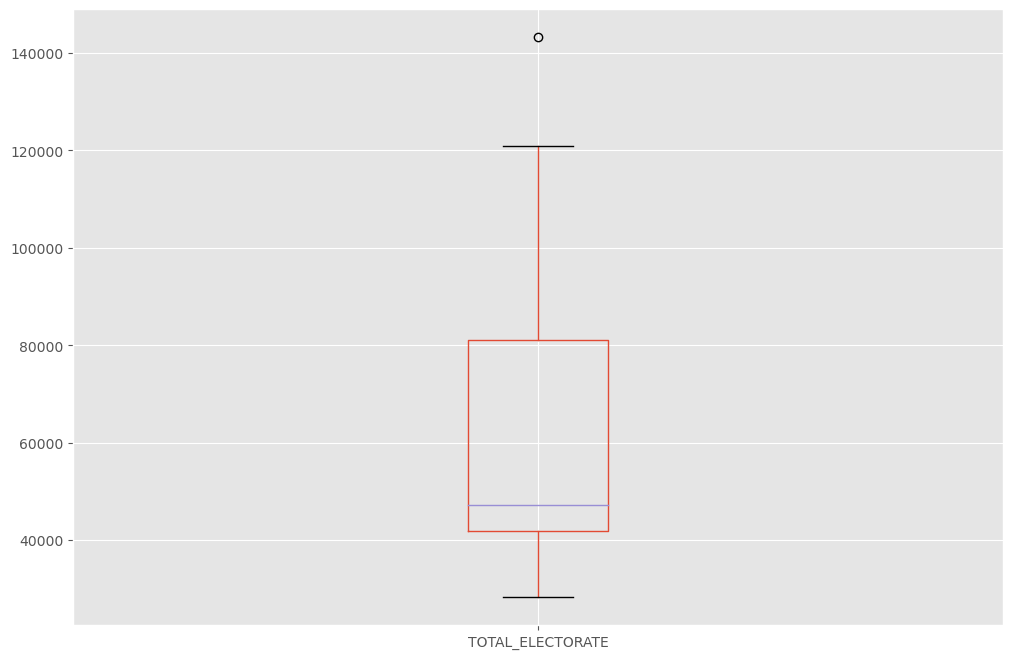

In [29]:
#Check if there is any outliers

df.boxplot(column=['TOTAL_ELECTORATE'])

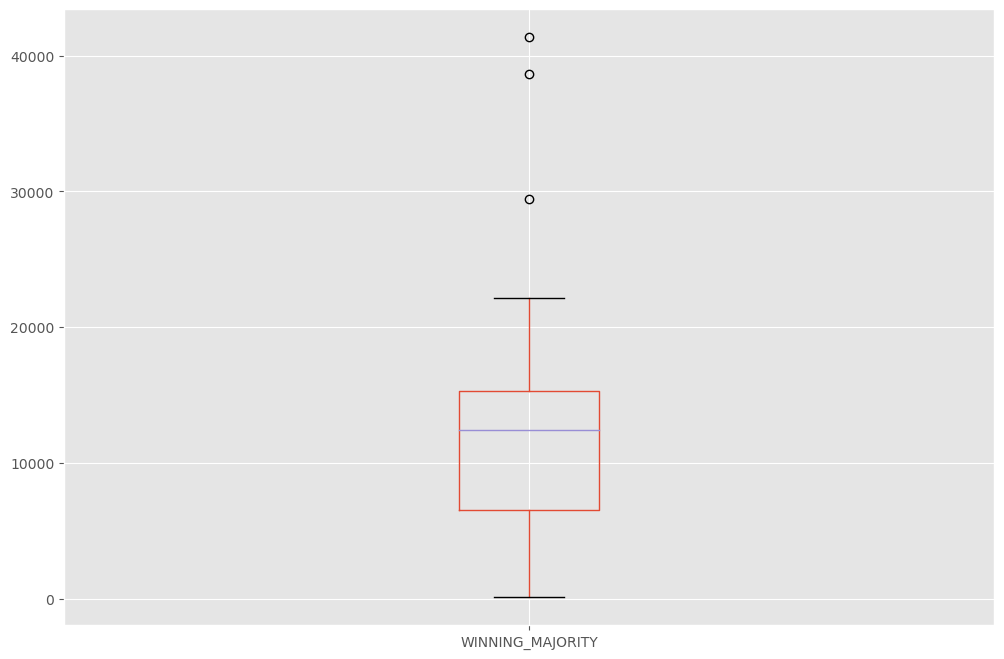

In [19]:
gps_constituencies = df[df['WINNING_COALITION'] == 'GPS']
gps_constituencies.boxplot(column=['WINNING_MAJORITY'])
plt.show()

<Axes: >

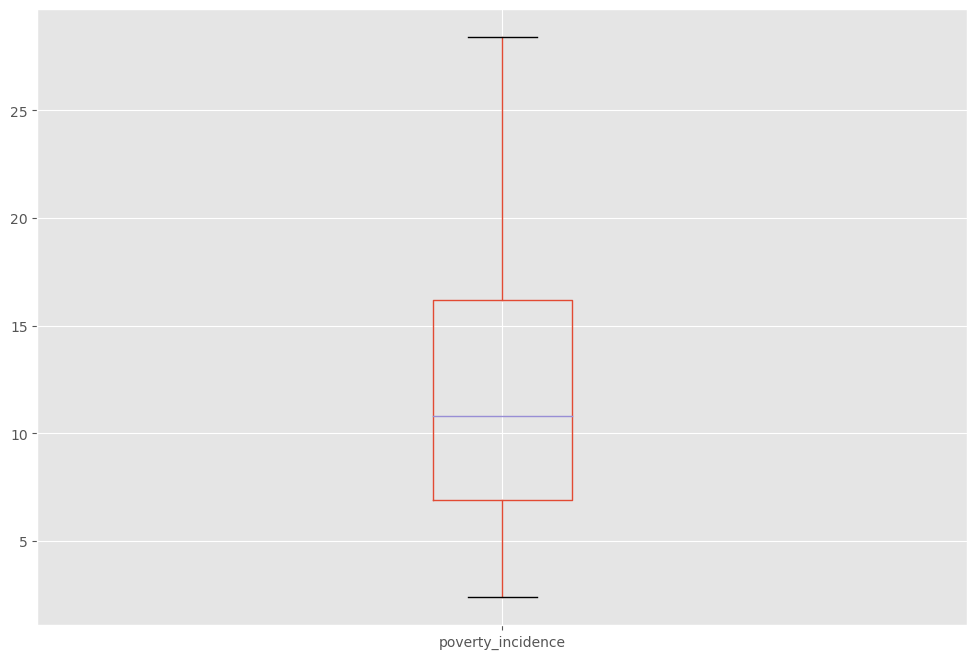

In [20]:
df.boxplot(column=['poverty_incidence'])

In [36]:
df.WINNING_MAJORITY.dtype

dtype('float64')

In [13]:
df.head()

,UNIQUE_CODE,PARLIAMENTARY_CODE,PARLIAMENTARY_NAME,TOTAL_ELECTORS,MALAY_p,CHINESE_p,INDIANS_p,ORANG_ASLI_p,BUMIPUTERA_SABAH_p,BUMIPUTERA_SARAWAK_p,OTHERS_p,18-20_p,21-29_p,30-39_p,40-49_p,50-59_p,60-69_p,70-79_p,80-89_p,ABOVE_90_p,MALE_p,WOMEN_p,CLASSIFICATION,WINNING_COALITION,WINNING_PARTY,TOTAL_ELECTORATE,WINNING_MAJORITY,TOTAL_VALID_VOTES,PH_VOTE,PN_VOTE,GPS_VOTE,area_km2,population_total,nationality_citizen,nationality_non_citizen,sex_male,sex_female,housing_total,household_total,household_size_avg,labour_participation_rate,labour_unemployment_rate,income_median,income_avg,expenditure_avg,gini,poverty_incidence
0,P.192,P.192,MAS GADING,47171,5.14,17.08,0.18,0.01,0.42,76.84,0.32,6.47,21.45,19.52,16.99,16.74,11.32,5.39,1.70,0.41,51.27,48.73,RURAL,PH,DAP,47171,5480.0,31379.0,17274.0,NaN,11794.0,1481,51434,48849,2585,27193,24241,15913,11991,4.3,66.7,3.3,3843,4857,2940,0.342,9.5
1,P.193,P.193,SANTUBONG,79540,78.03,7.92,0.09,0.00,0.26,13.36,0.34,8.21,25.10,21.72,16.93,13.77,8.85,4.02,1.13,0.26,49.54,50.46,SEMI URBAN,GPS,PBB,79540,38681.0,51809.0,5058.0,NaN,43739.0,1501,117751,115123,2628,59689,58062,33334,26883,4.4,64.7,4.5,4801,5784,3378,0.345,11.7
2,P.194,P.194,PETRA JAYA,109809,69.37,13.41,0.59,0.00,0.33,15.91,0.38,7.47,23.86,22.65,16.97,13.88,9.29,4.27,1.30,0.31,49.04,50.96,URBAN,GPS,PBB,109809,41363.0,69163.0,13382.0,NaN,54745.0,126,150813,149617,1196,75216,75597,42218,34133,4.4,64.8,4.5,6336,7665,4260,0.363,6.1
3,P.195,P.195,BANDAR KUCHING,109710,4.53,85.26,0.70,0.00,0.24,8.73,0.55,3.51,12.60,16.00,17.06,18.08,18.04,10.19,3.61,0.93,48.63,51.37,URBAN,PH,DAP,109710,28891.0,63575.0,45353.0,NaN,16462.0,35,116280,113020,3260,58483,57797,35812,30221,3.9,64.6,4.7,5473,7712,4457,0.418,4.3
4,P.196,P.196,STAMPIN,121009,14.56,61.57,0.68,0.00,0.30,22.56,0.32,6.77,22.21,23.09,19.21,13.30,9.27,4.55,1.32,0.28,50.56,49.44,URBAN,PH,DAP,121009,7158.0,73753.0,39310.0,NaN,32152.0,194,212217,208809,3408,107718,104499,66734,50187,4.2,67.1,4.8,6089,7765,4465,0.364,3.0


In [4]:
#determining percentage of vote garnered by all parties
df['GPS_Percentage'] = (df['GPS_VOTE']/df['TOTAL_VALID_VOTES']) * 100
df['PH_Percentage'] = (df['PH_VOTE']/df['TOTAL_VALID_VOTES']) * 100
df['PN_Percentage'] = (df['PN_VOTE']/df['TOTAL_VALID_VOTES']) * 100

df

,UNIQUE_CODE,PARLIAMENTARY_CODE,PARLIAMENTARY_NAME,TOTAL_ELECTORS,MALAY_p,CHINESE_p,INDIANS_p,ORANG_ASLI_p,BUMIPUTERA_SABAH_p,BUMIPUTERA_SARAWAK_p,OTHERS_p,18-20_p,21-29_p,30-39_p,40-49_p,50-59_p,60-69_p,70-79_p,80-89_p,ABOVE_90_p,MALE_p,WOMEN_p,CLASSIFICATION,WINNING_COALITION,WINNING_PARTY,TOTAL_ELECTORATE,WINNING_MAJORITY,TOTAL_VALID_VOTES,PH_VOTE,PN_VOTE,GPS_VOTE,area_km2,population_total,nationality_citizen,nationality_non_citizen,sex_male,sex_female,housing_total,household_total,household_size_avg,labour_participation_rate,labour_unemployment_rate,income_median,income_avg,expenditure_avg,gini,poverty_incidence,GPS_Percentage,PH_Percentage,PN_Percentage
0,P.192,P.192,MAS GADING,47171,5.14,17.08,0.18,0.01,0.42,76.84,0.32,6.47,21.45,19.52,16.99,16.74,11.32,5.39,1.70,0.41,51.27,48.73,RURAL,PH,DAP,47171,5480,31379,17274.0,NaN,11794,1481,51434,48849,2585,27193,24241,15913,11991,4.3,66.7,3.3,3843,4857,2940,0.342,9.5,37.585646,55.049555,NaN
1,P.193,P.193,SANTUBONG,79540,78.03,7.92,0.09,0.00,0.26,13.36,0.34,8.21,25.10,21.72,16.93,13.77,8.85,4.02,1.13,0.26,49.54,50.46,SEMI URBAN,GPS,PBB,79540,38681,51809,5058.0,NaN,43739,1501,117751,115123,2628,59689,58062,33334,26883,4.4,64.7,4.5,4801,5784,3378,0.345,11.7,84.423556,9.762783,NaN
2,P.194,P.194,PETRA JAYA,109809,69.37,13.41,0.59,0.00,0.33,15.91,0.38,7.47,23.86,22.65,16.97,13.88,9.29,4.27,1.30,0.31,49.04,50.96,URBAN,GPS,PBB,109809,41363,69163,13382.0,NaN,54745,126,150813,149617,1196,75216,75597,42218,34133,4.4,64.8,4.5,6336,7665,4260,0.363,6.1,79.153594,19.348496,NaN
3,P.195,P.195,BANDAR KUCHING,109710,4.53,85.26,0.70,0.00,0.24,8.73,0.55,3.51,12.60,16.00,17.06,18.08,18.04,10.19,3.61,0.93,48.63,51.37,URBAN,PH,DAP,109710,28891,63575,45353.0,NaN,16462,35,116280,113020,3260,58483,57797,35812,30221,3.9,64.6,4.7,5473,7712,4457,0.418,4.3,25.893826,71.337790,NaN
4,P.196,P.196,STAMPIN,121009,14.56,61.57,0.68,0.00,0.30,22.56,0.32,6.77,22.21,23.09,19.21,13.30,9.27,4.55,1.32,0.28,50.56,49.44,URBAN,PH,DAP,121009,7158,73753,39310.0,NaN,32152,194,212217,208809,3408,107718,104499,66734,50187,4.2,67.1,4.8,6089,7765,4465,0.364,3.0,43.594159,53.299527,NaN
5,P.197,P.197,KOTA SAMARAHAN,82229,55.76,13.26,0.24,0.01,0.57,29.87,0.29,8.39,25.19,23.72,17.60,12.31,7.79,3.62,1.16,0.21,50.63,49.37,SEMI URBAN,GPS,PBB,82229,29445,55111,12833.0,NaN,42278,745,158521,157010,1511,77491,81030,49252,43953,3.8,64.6,4.7,5281,6406,3723,0.343,7.7,76.714268,23.285732,NaN
6,P.198,P.198,PUNCAK BORNEO,79969,4.80,24.91,0.18,0.01,0.33,69.49,0.28,6.54,20.63,21.19,17.56,15.87,11.13,5.09,1.56,0.43,50.76,49.24,RURAL,GPS,PBB,79969,13338,51154,16119.0,NaN,29457,1328,80780,79770,1010,42097,38683,26067,18499,4.3,64.6,5.0,3780,4920,2960,0.348,11.0,57.584940,31.510732,NaN
7,P.199,P.199,SERIAN,65273,7.60,10.21,0.17,0.00,0.23,81.54,0.25,6.35,19.87,20.48,17.37,16.78,11.81,5.40,1.53,0.41,50.78,49.22,RURAL,GPS,SUPP,65273,16697,39974,5289.0,NaN,22876,1463,61744,60623,1121,31570,30174,18892,14711,4.2,64.5,4.9,3274,4558,2643,0.387,20.8,57.227198,13.231100,NaN
8,P.200,P.200,BATANG SADONG,32640,69.99,5.19,0.05,0.00,0.20,24.35,0.22,6.67,19.73,20.49,16.47,16.68,11.80,6.01,1.62,0.53,49.37,50.63,RURAL,GPS,PBB,32640,14893,22443,3775.0,NaN,18668,1031,33694,31438,2256,17644,16050,9661,8308,4.1,70.1,4.4,2935,4089,2324,0.377,18.4,83.179611,16.820389,NaN
9,P.201,P.201,BATANG LUPAR,43072,70.74,2.70,0.02,0.00,0.15,26.03,0.36,6.38,20.46,21.76,16.54,16.58,10.83,5.40,1.56,0.50,50.05,49.95,RURAL,GPS,PBB,43072,14463,27559,2768.0,5164.0,19627,1990,38339,37567,772,19659,18680,10843,8829,4.4,69.9,4.1,2579,3316,2324,0.325,28.4,71.218114,10.043906,18.737980


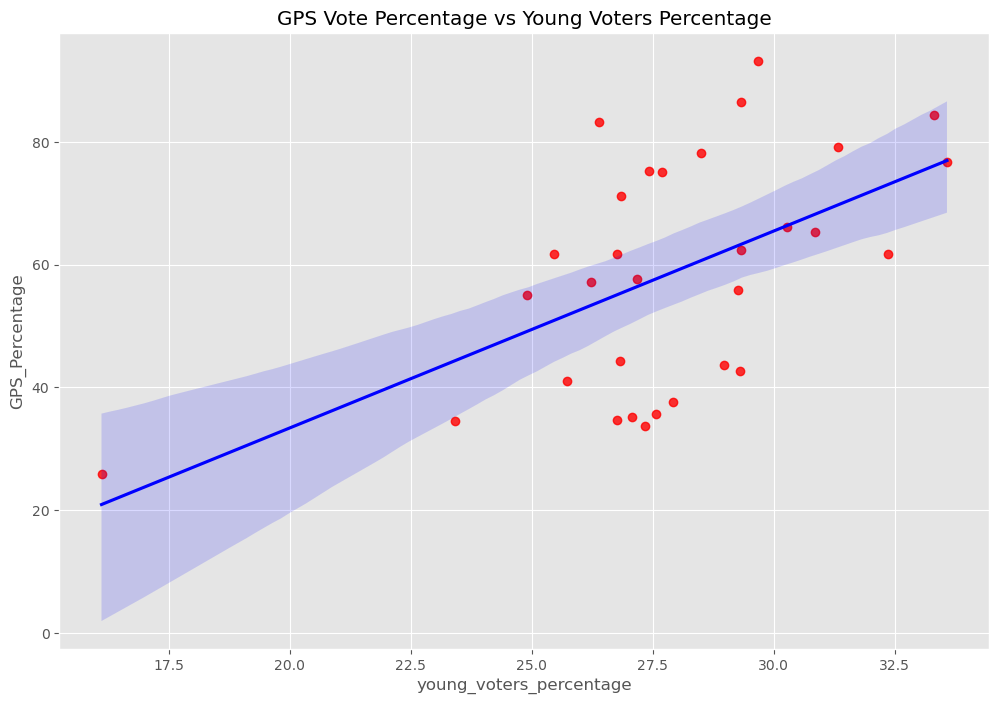

In [22]:
# Determining the correlation between GPS vote percentage and young voters percentage

df['young_voters_percentage'] = df['18-20_p'] + df['21-29_p']
sns.regplot(x='young_voters_percentage', y='GPS_Percentage', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

plt.title('GPS Vote Percentage vs Young Voters Percentage')

plt.show()

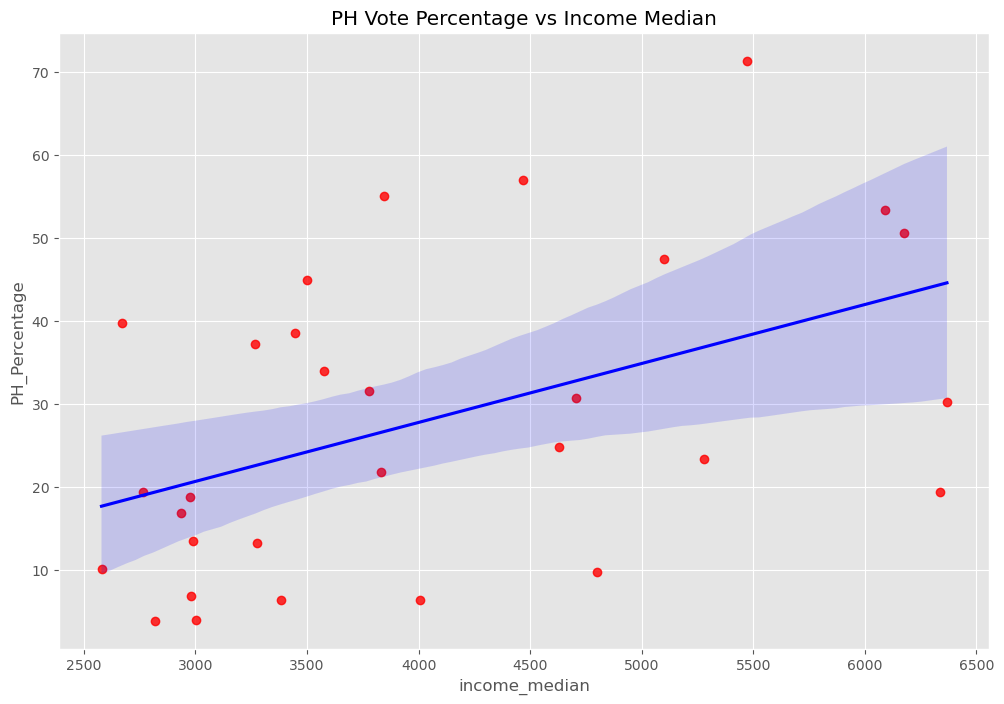

In [28]:
# Determining the correlation between PH vote percentage and income median

sns.regplot(x='income_median', y='PH_Percentage', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.title('PH Vote Percentage vs Income Median')

plt.show()

In [5]:
#correlation matrix

vote_perc_byRace = ['MALAY_p', 'CHINESE_p', 'BUMIPUTERA_SARAWAK_p']
vote_perc_byParty = ['GPS_Percentage','PH_Percentage', 'PN_Percentage']
economic_indicators = ['labour_unemployment_rate', 'income_median','gini','poverty_incidence']

numeric_df = df[vote_perc_byRace + vote_perc_byParty + economic_indicators]
correlation_matrix = numeric_df.corr()
correlation_matrix


,MALAY_p,CHINESE_p,BUMIPUTERA_SARAWAK_p,GPS_Percentage,PH_Percentage,PN_Percentage,labour_unemployment_rate,income_median,gini,poverty_incidence
MALAY_p,1.000000,-0.276381,-0.638204,0.484025,-0.437971,0.122862,-0.010394,0.135979,-0.151985,0.280360
CHINESE_p,-0.276381,1.000000,-0.562146,-0.531938,0.777291,-0.503592,-0.061810,0.566940,0.389428,-0.532973
BUMIPUTERA_SARAWAK_p,-0.638204,-0.562146,1.000000,0.002876,-0.251389,0.055384,0.045287,-0.581488,-0.190800,0.192150
GPS_Percentage,0.484025,-0.531938,0.002876,1.000000,-0.542007,-0.733335,0.219572,-0.069060,-0.179884,0.209023
PH_Percentage,-0.437971,0.777291,-0.251389,-0.542007,1.000000,-0.705156,-0.188222,0.462173,0.190303,-0.484642
PN_Percentage,0.122862,-0.503592,0.055384,-0.733335,-0.705156,1.000000,0.863889,-0.526855,0.279576,0.278645
labour_unemployment_rate,-0.010394,-0.061810,0.045287,0.219572,-0.188222,0.863889,1.000000,-0.273860,0.336196,0.277773
income_median,0.135979,0.566940,-0.581488,-0.069060,0.462173,-0.526855,-0.273860,1.000000,0.047654,-0.731558
gini,-0.151985,0.389428,-0.190800,-0.179884,0.190303,0.279576,0.336196,0.047654,1.000000,0.034011
poverty_incidence,0.280360,-0.532973,0.192150,0.209023,-0.484642,0.278645,0.277773,-0.731558,0.034011,1.000000


In [7]:
#correlation matrix between voters race percentage and winning party vote percentage for each constituencies

vote_perc_byRace = ['MALAY_p', 'CHINESE_p', 'BUMIPUTERA_SARAWAK_p']
vote_perc_byParty = ['GPS_Percentage','PH_Percentage', 'PN_Percentage']


numeric_df = df[vote_perc_byRace + vote_perc_byParty]
correlation_matrix1 = numeric_df.corr()
correlation_matrix1

,MALAY_p,CHINESE_p,BUMIPUTERA_SARAWAK_p,GPS_Percentage,PH_Percentage,PN_Percentage
MALAY_p,1.000000,-0.276381,-0.638204,0.484025,-0.437971,0.122862
CHINESE_p,-0.276381,1.000000,-0.562146,-0.531938,0.777291,-0.503592
BUMIPUTERA_SARAWAK_p,-0.638204,-0.562146,1.000000,0.002876,-0.251389,0.055384
GPS_Percentage,0.484025,-0.531938,0.002876,1.000000,-0.542007,-0.733335
PH_Percentage,-0.437971,0.777291,-0.251389,-0.542007,1.000000,-0.705156
PN_Percentage,0.122862,-0.503592,0.055384,-0.733335,-0.705156,1.000000


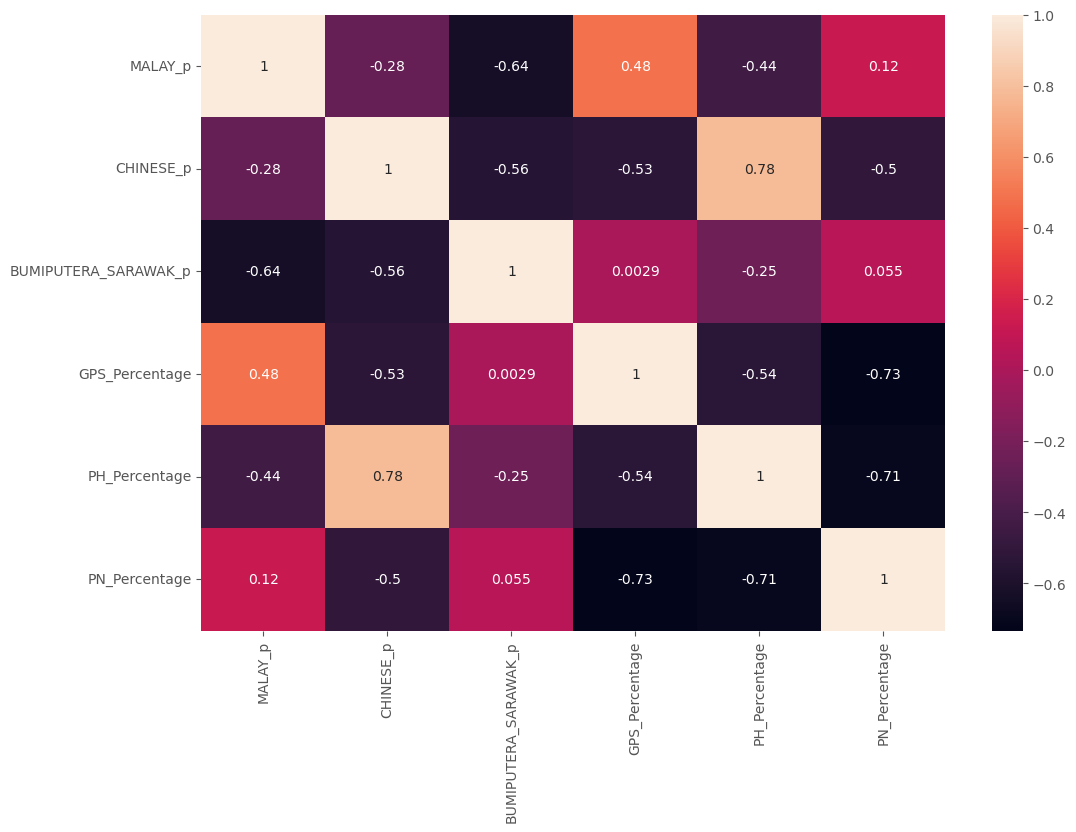

In [8]:
sns.heatmap(correlation_matrix1, annot=True)
plt.title('Correlation between constituency racial compisition and votes by party')
plt.show()

In [12]:
corr_unstacked = correlation_matrix1.unstack()
corr_unstacked

MALAY_p               MALAY_p                 1.000000
                      CHINESE_p              -0.276381
                      BUMIPUTERA_SARAWAK_p   -0.638204
                      GPS_Percentage          0.484025
                      PH_Percentage          -0.437971
                      PN_Percentage           0.122862
CHINESE_p             MALAY_p                -0.276381
                      CHINESE_p               1.000000
                      BUMIPUTERA_SARAWAK_p   -0.562146
                      GPS_Percentage         -0.531938
                      PH_Percentage           0.777291
                      PN_Percentage          -0.503592
BUMIPUTERA_SARAWAK_p  MALAY_p                -0.638204
                      CHINESE_p              -0.562146
                      BUMIPUTERA_SARAWAK_p    1.000000
                      GPS_Percentage          0.002876
                      PH_Percentage          -0.251389
                      PN_Percentage           0.055384
GPS_Percen

In [16]:
high_corr = corr_unstacked[(corr_unstacked>0.5) & (corr_unstacked!= 1)]
high_corr

CHINESE_p      PH_Percentage    0.777291
PH_Percentage  CHINESE_p        0.777291
dtype: float64

In [9]:
#correlation matrix between socioeconomic indicators and winning party vote percentage for each constituencies

economic_indicators = ['labour_unemployment_rate', 'income_median', 'gini', 'poverty_incidence']
vote_perc_byParty = ['GPS_Percentage','PH_Percentage', 'PN_Percentage']

numeric_df = df[economic_indicators + vote_perc_byParty]
correlation_matrix2 = numeric_df.corr()
correlation_matrix2

,labour_unemployment_rate,income_median,gini,poverty_incidence,GPS_Percentage,PH_Percentage,PN_Percentage
labour_unemployment_rate,1.000000,-0.273860,0.336196,0.277773,0.219572,-0.188222,0.863889
income_median,-0.273860,1.000000,0.047654,-0.731558,-0.069060,0.462173,-0.526855
gini,0.336196,0.047654,1.000000,0.034011,-0.179884,0.190303,0.279576
poverty_incidence,0.277773,-0.731558,0.034011,1.000000,0.209023,-0.484642,0.278645
GPS_Percentage,0.219572,-0.069060,-0.179884,0.209023,1.000000,-0.542007,-0.733335
PH_Percentage,-0.188222,0.462173,0.190303,-0.484642,-0.542007,1.000000,-0.705156
PN_Percentage,0.863889,-0.526855,0.279576,0.278645,-0.733335,-0.705156,1.000000


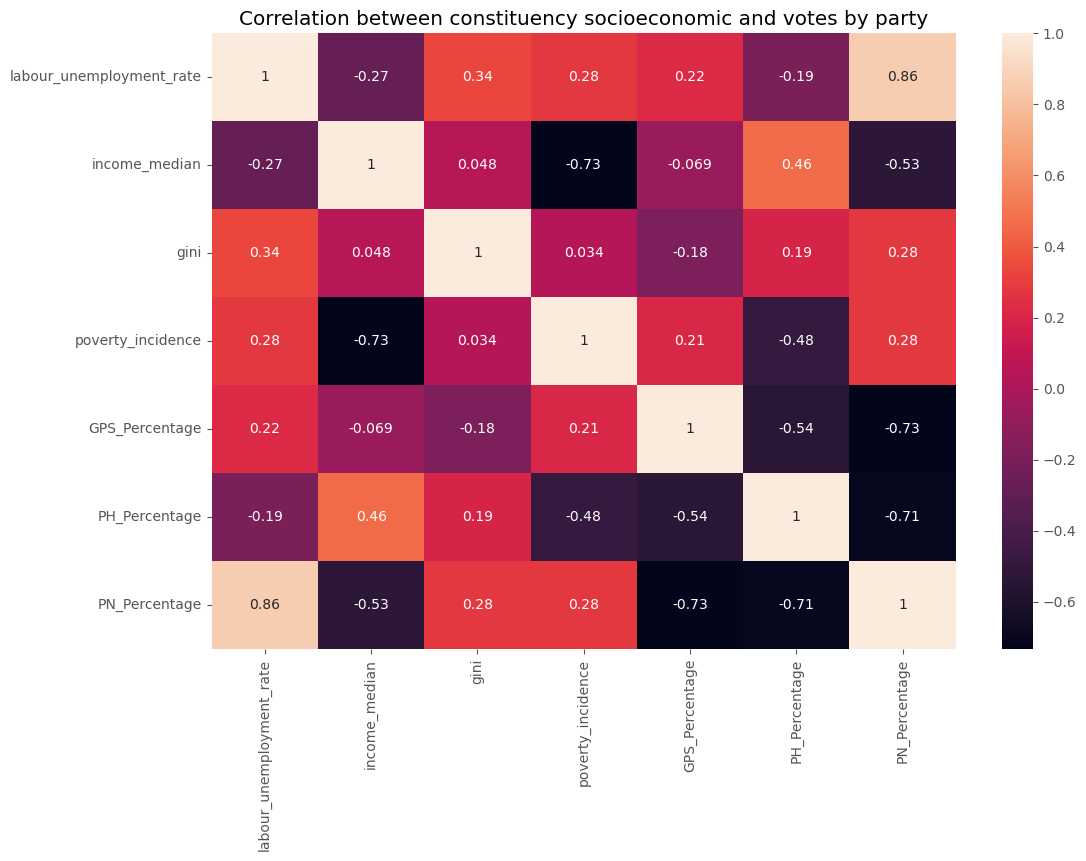

In [13]:
sns.heatmap(correlation_matrix2, annot=True)
plt.title('Correlation between constituency socioeconomic and votes by party')
plt.show()

In [17]:
corr_unstacked2 = correlation_matrix2.unstack()
corr_unstacked2

labour_unemployment_rate  labour_unemployment_rate    1.000000
                          income_median              -0.273860
                          gini                        0.336196
                          poverty_incidence           0.277773
                          GPS_Percentage              0.219572
                          PH_Percentage              -0.188222
                          PN_Percentage               0.863889
income_median             labour_unemployment_rate   -0.273860
                          income_median               1.000000
                          gini                        0.047654
                          poverty_incidence          -0.731558
                          GPS_Percentage             -0.069060
                          PH_Percentage               0.462173
                          PN_Percentage              -0.526855
gini                      labour_unemployment_rate    0.336196
                          income_median               0

In [18]:
high_corr2 = corr_unstacked2[(corr_unstacked2>0.5) & (corr_unstacked2 != 1)]
high_corr2

labour_unemployment_rate  PN_Percentage               0.863889
PN_Percentage             labour_unemployment_rate    0.863889
dtype: float64